<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data
In this lab, we perform Exploratory Data Analysis and Feature Engineering.
## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

### Import Libraries and Define Auxiliary Functions

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

### Exploratory Data Analysis
First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


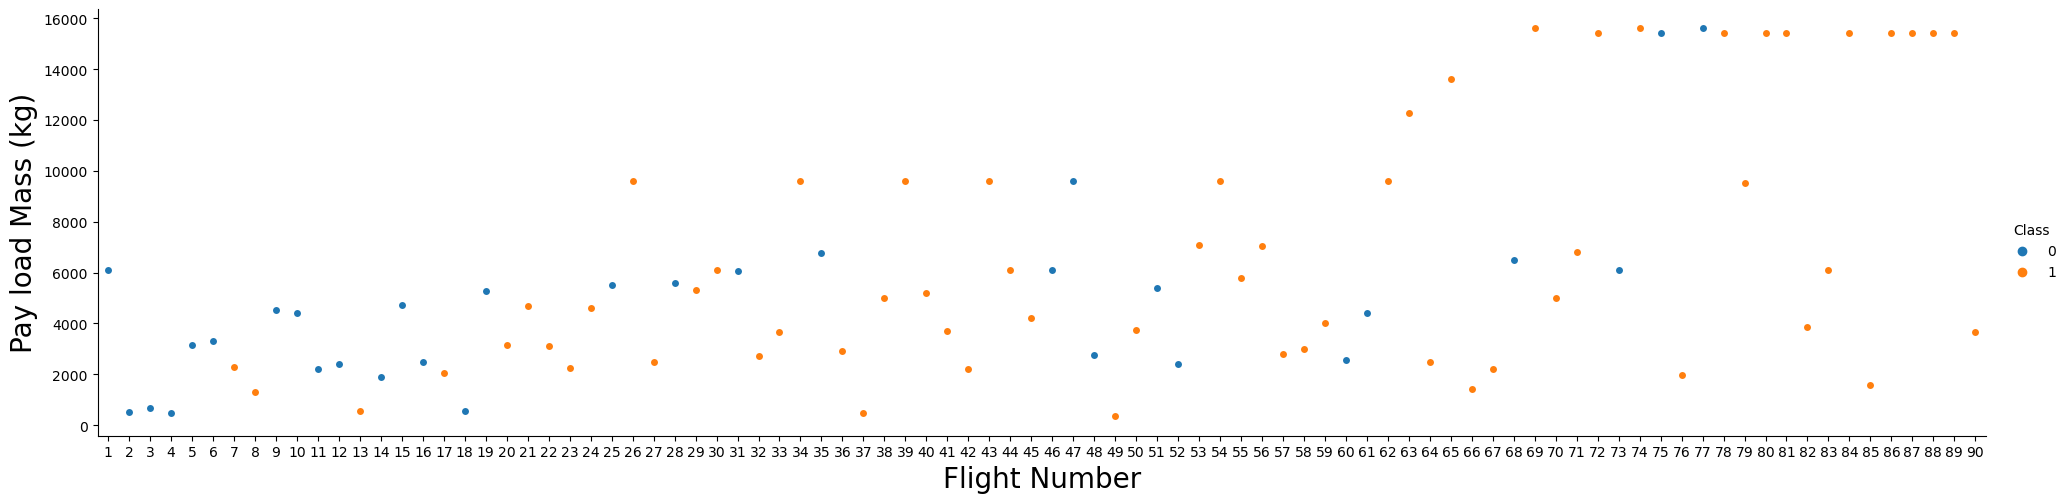

In [3]:
sns.catplot(x = "FlightNumber", y = "PayloadMass", hue = "Class", data = df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


In [4]:
df.groupby(['LaunchSite']).mean()['Class']

LaunchSite
CCAFS SLC 40    0.600000
KSC LC 39A      0.772727
VAFB SLC 4E     0.769231
Name: Class, dtype: float64

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


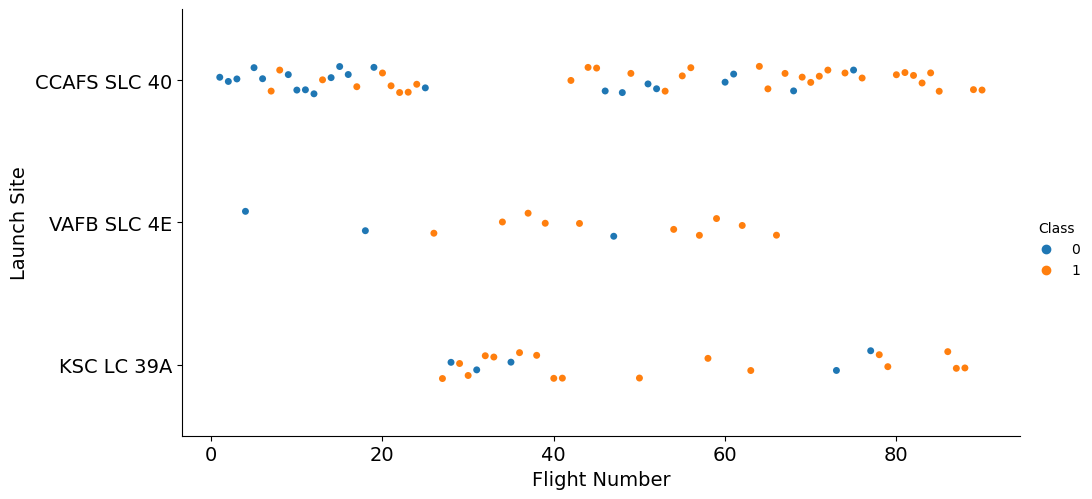

In [5]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x = "FlightNumber", y = "LaunchSite", hue = "Class", data = df, aspect = 2)
plt.xlabel("Flight Number",fontsize=14)
plt.ylabel("Launch Site",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [6]:
early_flights = df[df["FlightNumber"] < 26]
later_flights = df[df["FlightNumber"] >= 26]
print("Flights 1-25\n", early_flights.groupby(['LaunchSite']).mean()['Class'])
print("\nFlights 26-90\n", later_flights.groupby(['LaunchSite']).mean()['Class'])

Flights 1-25
 LaunchSite
CCAFS SLC 40    0.391304
VAFB SLC 4E     0.000000
Name: Class, dtype: float64

Flights 26-90
 LaunchSite
CCAFS SLC 40    0.750000
KSC LC 39A      0.772727
VAFB SLC 4E     0.909091
Name: Class, dtype: float64


`Conclusion:` from the scatter plot Flight Number vs. Launch Site, we see that the majority of launches were performed from <code>CCAFS LC-40</code>. There were a lot of failures in the range of flight numbers 1 - 25 with a success rate of 39%, but later success rate increased to 75% for flight numbers 26 - 90.

### TASK 2: Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.


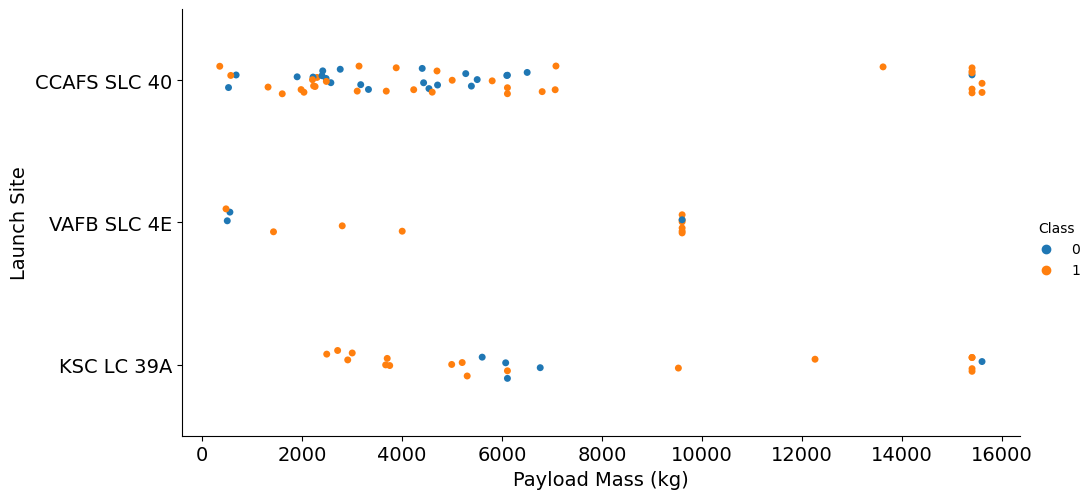

In [7]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x = "PayloadMass", y = "LaunchSite", hue = "Class", data = df, aspect = 2)
plt.xlabel("Payload Mass (kg)",fontsize=14)
plt.ylabel("Launch Site",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

`Conclusion:` for the VAFB-SLC  launchsite there are no rockets launched for heavypayload mass (greater than 10000).

### TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type. Let's create a `bar chart` for the sucess rate of each orbit.

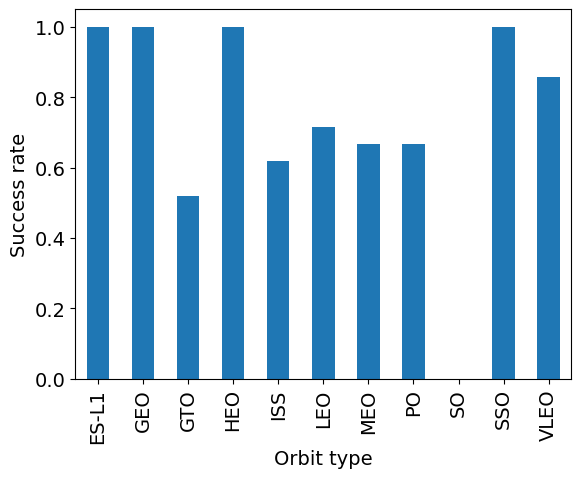

In [8]:
# Use groupby method on Orbit column and get the mean of Class column
df.groupby(["Orbit"]).mean()['Class'].plot(kind = "bar")
plt.ylabel("Success rate", fontsize=14)
plt.xlabel("Orbit type", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Conclusion:` `ES-L1, GEO, HEO, SSO, VLEO` orbits have high sucess rates, while `GTO, ISS, LEO, MEO, PO` have sucess rate only about 60%. `SO` orbit does not have successful launches.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

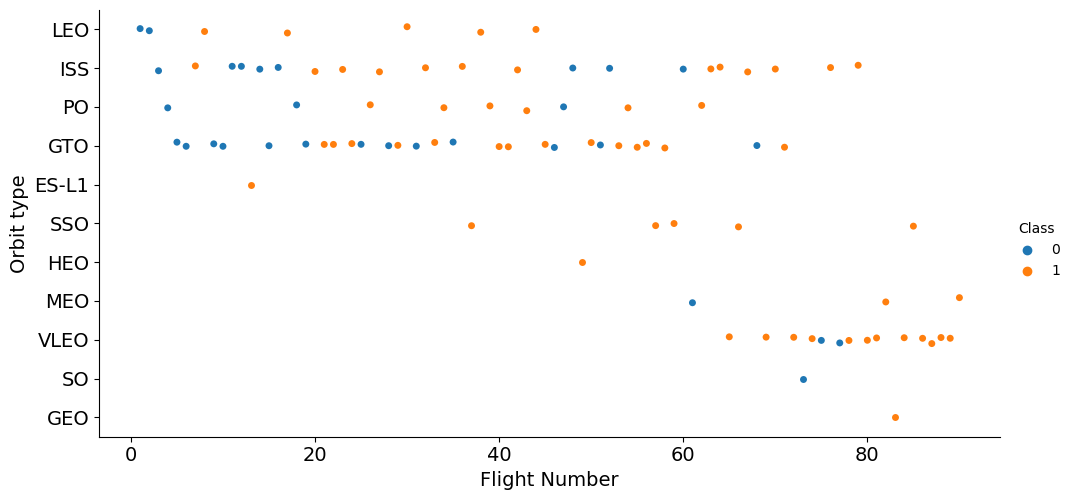

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x = "FlightNumber", y = "Orbit", hue = "Class", data = df, aspect = 2)
plt.xlabel("Flight Number",fontsize=14)
plt.ylabel("Orbit type",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

`Conclusion:`Among orbits with the highest success rate ES-L1, GEO, HEO had just 1 attempt, SSO – 5 attempts and all successful, VLEO – 12 successful out of 14 total. Launches to the VLEO orbit started in the resent years. GTO and ISS orbits have the highest number of launches and the lowest success rate.

### TASK  5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

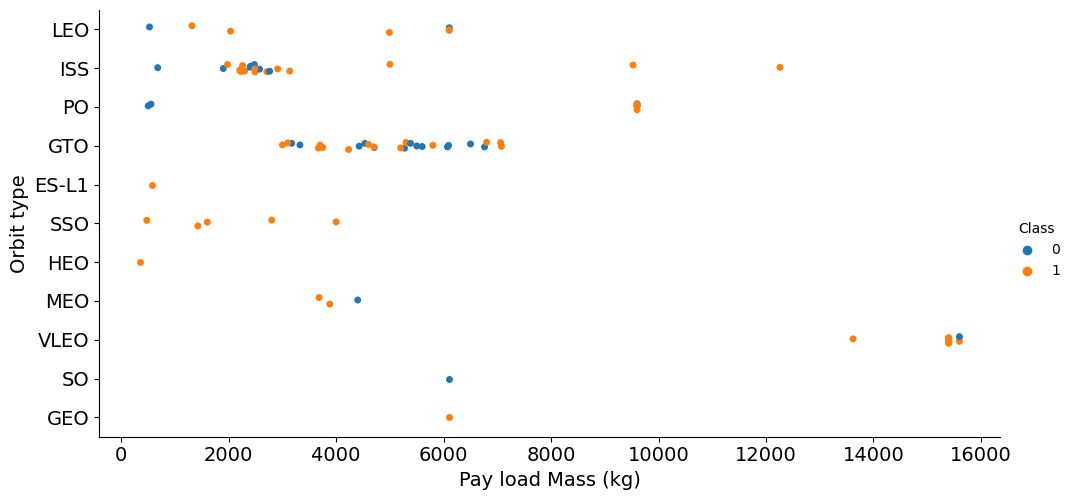

In [10]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x = "PayloadMass", y = "Orbit", hue = "Class", data = df, aspect = 2)
plt.xlabel("Pay load Mass (kg)",fontsize=14)
plt.ylabel("Orbit type",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

`Conclusion:` Only heavy payload mass (>13000 kg) was launched to the VLEO orbit. In contrast, only low payload mass (< 5000 kg) was used in case of SSO orbit. The majority of launches to ISS were done with 2000 – 4000 kg payload mass and to GTO – with 3000 – 7000 kg.

### TASK  6: Visualize the launch success yearly trend

We can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


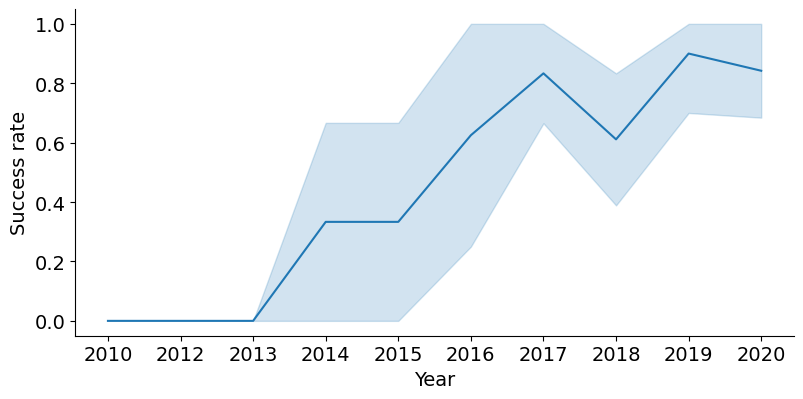

In [12]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.relplot(data = df, x = "Date", y = "Class", kind = "line", height=4, aspect = 2)
plt.ylabel("Success rate", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

`Conclusion`: the sucess rate since 2013 kept increasing till 2020.

## Features Engineering
By now, we obtained some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [14]:
# Use get_dummies() function on the categorical columns
dummy_vars = pd.get_dummies(features[["Orbit", "LaunchSite", "LandingPad", "Serial"]])
features_one_hot = pd.concat([features, dummy_vars], axis = 1)
features_one_hot.drop(["Orbit", "LaunchSite", "LandingPad", "Serial"], axis = 1, inplace = True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TASK  8: Cast all numeric columns to `float64`

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [15]:
# Use astype function
features_one_hot = features_one_hot.astype(float)
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [16]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)